In [1]:
# This block allows us to import from the benchmark folder,
# as if it was a package installed using pip
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from attrbench.evaluation import result, insertion_deletion_curves
from os import path
import os
import pickle as pkl
import json
mpl.rcParams['figure.dpi'] = 150

## Load and plot experiment data

Gradient: [0.65 - 0.66 - 0.67]
SmoothGrad: [0.63 - 0.64 - 0.65]
InputXGradient: [0.23 - 0.24 - 0.25]
IntegratedGradients: [0.27 - 0.28 - 0.29]
GuidedBackprop: [0.67 - 0.68 - 0.69]
Deconvolution: [0.66 - 0.67 - 0.68]
GuidedGradCAM: [0.67 - 0.68 - 0.69]
GradCAM: [0.66 - 0.67 - 0.68]


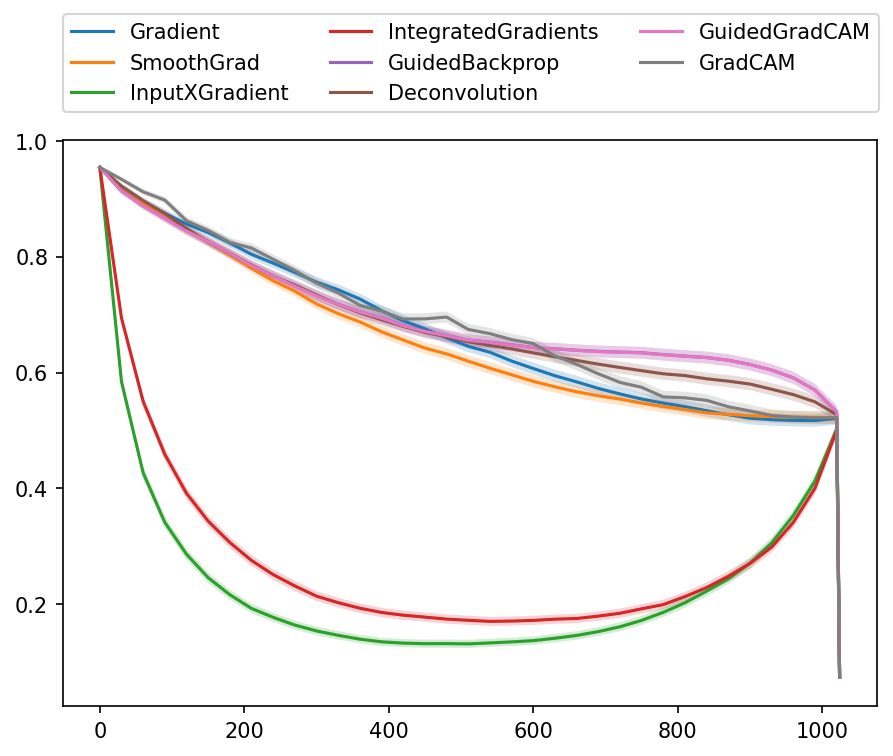

In [10]:
data = json.load(open("../out/transforms/deletion_cifar10_softmax.json", "r"))
data["x_range"] = [0] + data["x_range"] + [32*32]
#res = insertion_deletion_curves.Result(**data, mode="deletion")
res = result.LinePlotResult(**data)
fig, ax = res.plot(ci=True)
auc = res.auc()
for method in auc:
    print(f"{method}: [{auc[method]['lower']:.2f} - {auc[method]['mean']:.2f} - {auc[method]['upper']:.2f}]")

Gradient: [0.25 - 1.11 - 1.97]
SmoothGrad: [0.47 - 1.35 - 2.22]
InputXGradient: [1.13 - 2.06 - 2.98]
IntegratedGradients: [2.79 - 3.79 - 4.78]
GuidedBackprop: [0.39 - 1.20 - 2.02]
Deconvolution: [0.27 - 1.08 - 1.89]
GuidedGradCAM: [0.38 - 1.19 - 2.01]
GradCAM: [0.60 - 1.35 - 2.11]


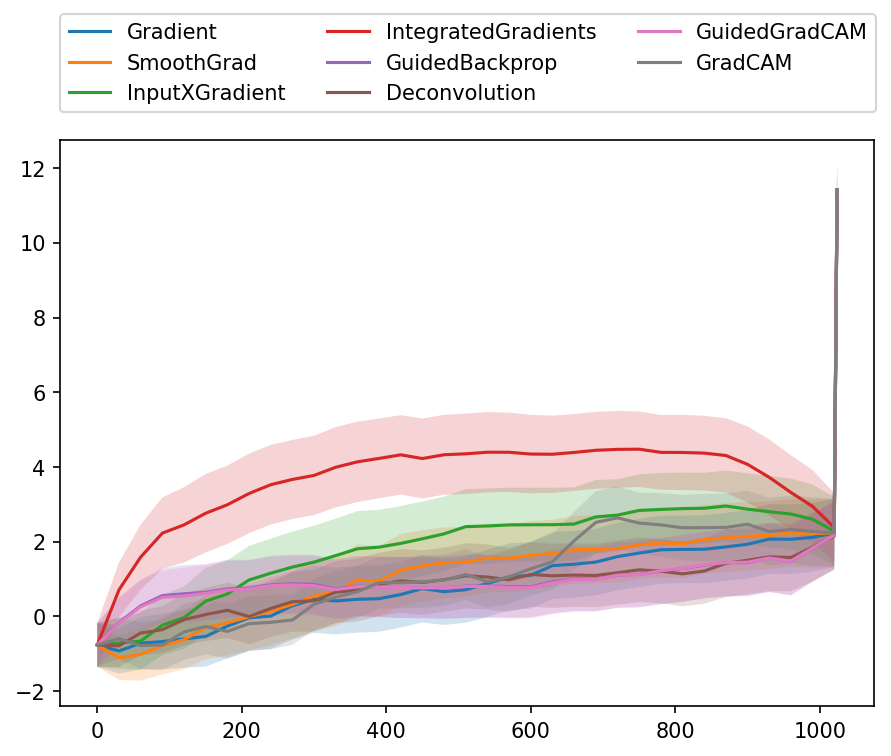

In [13]:
data = json.load(open("../scripts/result.json", "r"))
data["x_range"] = [0] + data["x_range"] + [32*32]
#res = insertion_deletion_curves.Result(**data, mode="deletion")
res = result.LinePlotResult(**data)
fig, ax = res.plot(ci=True)
auc = res.auc()
for method in auc:
    print(f"{method}: [{auc[method]['lower']:.2f} - {auc[method]['mean']:.2f} - {auc[method]['upper']:.2f}]")

In [5]:
fig.savefig("fig2.png", bbox_inches="tight")

## Plot using old code

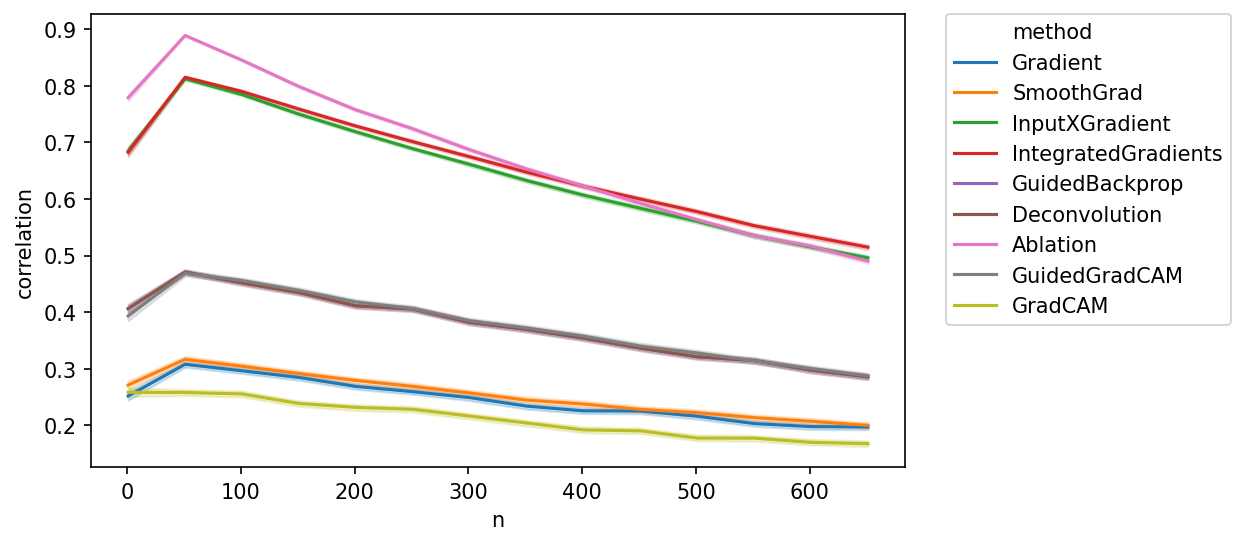

In [27]:
lineplot("../out/mnist/sensitivity_n/", x="n", y="correlation")

## Convert experiment results (deletion/insertion curves)

In [12]:
def convert_result(in_filename, out_filename):
    df = pkl.load(open(in_filename, "rb"))
    x_range = df["insertion"].unique()
    methods = df["method"].unique()
    raw = {}
    for method in methods:
        raw[method] = df[df["method"] == method][["difference"]].values.reshape((-1, len(x_range)))
    result = {
        "data": raw,
        "x_range": x_range
    }
    pkl.dump(result, open(out_filename, "wb"))

In [ ]:
res_dir = "../out/imagenette/insertion_curves"
convert_result(path.join(res_dir, "result.pkl"), path.join(res_dir, "result_new.pkl"))

## Convert experiment results (sensitivity-n)

In [12]:
#def convert_result_sens_n(in_filename, out_filename):
res_dir = "../out/imagenette/sensitivity_n"
in_filename = path.join(res_dir, "result.pkl")
df = pkl.load(open(in_filename, "rb"))

In [13]:
df

,sample,n,method,correlation
0,0,1,SmoothGrad,-0.179504
1,0,1,IntegratedGradients,-0.024632
2,0,501,SmoothGrad,-0.027357
3,0,501,IntegratedGradients,0.272074
4,0,1001,SmoothGrad,0.074383
...,...,...,...,...
470995,3924,9501,InputXGradient,0.071119
470996,3924,9501,GuidedBackprop,0.099337
470997,3924,9501,Deconvolution,-0.016700
470998,3924,9501,GuidedGradCAM,0.079232


In [14]:
def convert_result_sens_n(in_filename, out_filename):
    df = pkl.load(open(in_filename, "rb"))
    x_range = df["n"].unique()
    methods = df["method"].unique()
    raw = {}
    for method in methods:
        raw[method] = df[df["method"] == method][["correlation"]].values.reshape((-1, len(x_range)))
    result = {
        "data": raw,
        "x_range": x_range
    }
    pkl.dump(result, open(out_filename, "wb"))

In [21]:
res_dir = "../out/cifar10_old/sensitivity_n"
convert_result_sens_n(path.join(res_dir, "result.pkl"), path.join(res_dir, "result_new.pkl"))

EOFError: Ran out of input